<a href="https://colab.research.google.com/github/Trung0Minh/AIO2023-MODULE-5/blob/main/vanishing_gradient.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Load Data

In [1]:
import torch
from torch import nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import torchvision
from torchvision.datasets import FashionMNIST
import torchvision.transforms as transforms
import numpy as np

torch.manual_seed(42)
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

In [2]:
batch_size = 512
num_epochs = 300
lr = 0.01

In [3]:
train_dataset = FashionMNIST('./data', train=True, download=True, transform=transforms.ToTensor())
train_loader = DataLoader(train_dataset, batch_size, shuffle=True)
test_dataset = FashionMNIST('./data', train=False, download=True, transform=transforms.ToTensor())
test_loader = DataLoader(test_dataset, batch_size)

100%|██████████| 26.4M/26.4M [00:02<00:00, 9.88MB/s]


Extracting ./data/FashionMNIST/raw/train-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 29.5k/29.5k [00:00<00:00, 208kB/s]


Extracting ./data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 4.42M/4.42M [00:01<00:00, 3.80MB/s]


Extracting ./data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 5.15k/5.15k [00:00<00:00, 27.5MB/s]

Extracting ./data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw



--------------------------------------------------------------------------------

# Weight Increasing

In [4]:
class MLP(nn.Module):
    def __init__(self, input_dims, hidden_dims, output_dims):
        super().__init__()
        self.layers = nn.Sequential(
            nn.Flatten(),
            nn.Linear(input_dims, hidden_dims),
            nn.Sigmoid(),
            nn.Linear(hidden_dims, hidden_dims),
            nn.Sigmoid(),
            nn.Linear(hidden_dims, hidden_dims),
            nn.Sigmoid(),
            nn.Linear(hidden_dims, hidden_dims),
            nn.Sigmoid(),
            nn.Linear(hidden_dims, hidden_dims),
            nn.Sigmoid(),
            nn.Linear(hidden_dims, hidden_dims),
            nn.Sigmoid(),
            nn.Linear(hidden_dims, hidden_dims),
            nn.Sigmoid(),
            nn.Linear(hidden_dims, output_dims)
        )

        for m in self.modules():
            if isinstance(m, nn.Linear):
                nn.init.normal_(m.weight, mean=0.0, std=10)
                nn.init.constant_(m.bias, 0.0)

    def forward(self, x):
        return self.layers(x)

# Better Activaiton

In [ ]:
class MLP(nn.Module):
    def __init__(self, input_dims, hidden_dims, output_dims):
        super().__init__()
        self.layers = nn.Sequential(
            nn.Flatten(),
            nn.Linear(input_dims, hidden_dims),
            nn.ReLU(),
            nn.Linear(hidden_dims, hidden_dims),
            nn.ReLU(),
            nn.Linear(hidden_dims, hidden_dims),
            nn.ReLU(),
            nn.Linear(hidden_dims, hidden_dims),
            nn.ReLU(),
            nn.Linear(hidden_dims, hidden_dims),
            nn.ReLU(),
            nn.Linear(hidden_dims, hidden_dims),
            nn.ReLU(),
            nn.Linear(hidden_dims, hidden_dims),
            nn.ReLU(),
            nn.Linear(hidden_dims, output_dims)
        )

    def forward(self, x):
        return self.layers(x)

# Normalization Inside Network

In [ ]:
class MLP(nn.Module):
    def __init__(self, input_dims, hidden_dims, output_dims):
        super().__init__()
        self.layers = nn.Sequential(
            nn.Flatten(),
            nn.Linear(input_dims, hidden_dims),
            nn.BatchNorm1d(hidden_dims),
            nn.Sigmoid(),
            nn.Linear(hidden_dims, hidden_dims),
            nn.BatchNorm1d(hidden_dims),
            nn.Sigmoid(),
            nn.Linear(hidden_dims, hidden_dims),
            nn.BatchNorm1d(hidden_dims),
            nn.Sigmoid(),
            nn.Linear(hidden_dims, hidden_dims),
            nn.BatchNorm1d(hidden_dims),
            nn.Sigmoid(),
            nn.Linear(hidden_dims, hidden_dims),
            nn.BatchNorm1d(hidden_dims),
            nn.Sigmoid(),
            nn.Linear(hidden_dims, hidden_dims),
            nn.BatchNorm1d(hidden_dims),
            nn.Sigmoid(),
            nn.Linear(hidden_dims, hidden_dims),
            nn.BatchNorm1d(hidden_dims),
            nn.Sigmoid(),
            nn.Linear(hidden_dims, output_dims)
        )

    def forward(self, x):
        return self.layers(x)

# Custom Normalization

In [ ]:
class MyNormalization(nn.Module):
    def __init__(self):
        super().__init__()

    def forward(self, x):
        mean = torch.mean(x)
        std = torch.std(x)
        return (x - mean)/std

In [ ]:
class MLP(nn.Module):
    def __init__(self, input_dims, hidden_dims, output_dims):
        super().__init__()
        self.layers = nn.Sequential(
            nn.Flatten(),
            nn.Linear(input_dims, hidden_dims),
            nn.MyNormalization(hidden_dims),
            nn.Sigmoid(),
            nn.Linear(hidden_dims, hidden_dims),
            nn.MyNormalization(hidden_dims),
            nn.Sigmoid(),
            nn.Linear(hidden_dims, hidden_dims),
            nn.MyNormalization(hidden_dims),
            nn.Sigmoid(),
            nn.Linear(hidden_dims, hidden_dims),
            nn.MyNormalization(hidden_dims),
            nn.Sigmoid(),
            nn.Linear(hidden_dims, hidden_dims),
            nn.MyNormalization(hidden_dims),
            nn.Sigmoid(),
            nn.Linear(hidden_dims, hidden_dims),
            nn.MyNormalization(hidden_dims),
            nn.Sigmoid(),
            nn.Linear(hidden_dims, hidden_dims),
            nn.MyNormalization(hidden_dims),
            nn.Sigmoid(),
            nn.Linear(hidden_dims, output_dims)
        )

    def forward(self, x):
        return self.layers(x)

# Skip Connection

In [ ]:
class MLP(nn.Module):
    def __init__(self, input_dims, hidden_dims, output_dims):
        super(MLP, self).__init__()
        self.layer1 = nn.Linear(input_dims, hidden_dims)
        self.layer2 = nn.Linear(hidden_dims, hidden_dims)
        self.layer3 = nn.Linear(hidden_dims, hidden_dims)
        self.layer4 = nn.Linear(hidden_dims, hidden_dims)
        self.layer5 = nn.Linear(hidden_dims, hidden_dims)
        self.layer6 = nn.Linear(hidden_dims, hidden_dims)
        self.layer7 = nn.Linear(hidden_dims, hidden_dims)
        self.output = nn.Linear(hidden_dims, output_dims)

    def forward(self, x):
        x = nn.Flatten()(x)
        x = self.layer1(x)
        x = nn.Sigmoid()(x)
        skip_1 = x
        x = self.layer2(x)
        x = nn.Sigmoid()(x)
        x = self.layer3(x)
        x = nn.Sigmoid()(x)
        x = x + skip_1
        x = self.layer4(x)
        x = nn.Sigmoid()(x)
        skip_2 = x
        x = self.layer5(x)
        x = nn.Sigmoid()(x)
        x = self.layer6(x)
        x = nn.Sigmoid()(x)
        x = self.layer7(x)
        x = nn.Sigmoid()(x)
        x = x + skip_2
        x = self.output(x)
        return x

---

## Optimizer

In [5]:
model = MLP(input_dims=784, hidden_dims=128, output_dims=10).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=lr)

## Better Optimizer

In [ ]:
model = MLP(input_dims=784, hidden_dims=128, output_dims=10).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=lr)

---

# Train Some Layers

In [ ]:
class MLP_1layer(nn.Module):
    def __init__(self, input_dims, output_dims):
        super(MLP_1layer, self).__init__()
        self.layer1 = nn.Linear(input_dims, output_dims)
        for m in self.modules():
            if isinstance(m, nn.Linear):
                nn.init.normal_(m.weight, mean=0.0, std=0.05)
                nn.init.constant_(m.bias, 0.0)

    def forward(self, x):
        x = nn.Flatten()(x)
        x = self.layer1(x)
        x = nn.Sigmoid()(x)
        return x


class MLP_2layers(nn.Module):
    def __init__(self, input_dims, output_dims):
        super(MLP_2layers, self).__init__()
        self.layer1 = nn.Linear(input_dims, output_dims)
        self.layer2 = nn.Linear(output_dims, output_dims)
        for m in self.modules():
            if isinstance(m, nn.Linear):
                nn.init.normal_(m.weight, mean=0.0, std=0.05)
                nn.init.constant_(m.bias, 0.0)

    def forward(self, x):
        x = nn.Flatten()(x)
        x = self.layer1(x)
        x = nn.Sigmoid()(x)
        x = self.layer2(x)
        x = nn.Sigmoid()(x)
        return x

In [ ]:
first = MLP_2layers(input_dims=784, output_dims=128)
second = MLP_2layers(input_dims=128, output_dims=128)
third = MLP_2layers(input_dims=128, output_dims=128)
fourth = MLP_1layer(input_dims=128, output_dims=128)

## Train 1

In [ ]:
model = nn.Sequential(
    first,
    nn.Linear(128, 10)
).to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=lr)

## Train 2

In [ ]:
model = nn.Sequential(
    first.requires_grad_(False),
    second,
    nn.Linear(128, 10)
).to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=lr)

## Train 3

In [ ]:
model = nn.Sequential(
    first,
    second,
    nn.Linear(128, 10)
).to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=lr)

## Train 4

In [ ]:
model = nn.Sequential(
    first.requires_grad_(False),
    second.requires_grad_(False),
    third,
    nn.Linear(128, 10)
).to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=lr)

## Train 5

In [ ]:
model = nn.Sequential(
    first,
    second,
    third,
    nn.Linear(128, 10)
).to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=lr)

## Train 6

In [ ]:
model = nn.Sequential(
    first.requires_grad_(False),
    second.requires_grad_(False),
    third.requires_grad_(False),
    fourth,
    nn.Linear(128, 10)
).to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=lr)

## Train 7

In [ ]:
model = nn.Sequential(
    first,
    second,
    third,
    fourth,
    nn.Linear(128, 10)
).to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=lr)

---

In [6]:
train_losses = []
train_accs = []
val_losses = []
val_accs = []

for epoch in range(num_epochs):
    model.train()
    train_loss = 0.0
    train_acc = 0.0
    for X, y in train_loader:
        X, y = X.to(device), y.to(device)
        optimizer.zero_grad()
        y_pred = model(X)
        loss = criterion(y_pred, y)
        loss.backward()
        optimizer.step()
        train_loss += loss.item()
        train_acc += (y_pred.argmax(dim=1) == y).sum() / len(y)
    train_losses.append(train_loss / len(train_loader))
    train_accs.append(train_acc / len(train_loader))

    model.eval()
    val_loss = 0.0
    val_acc = 0.0
    with torch.no_grad():
        for X, y in test_loader:
            X, y = X.to(device), y.to(device)
            y_pred = model(X)
            loss = criterion(y_pred, y)
            val_loss += loss.item()
            val_acc += (y_pred.argmax(dim=1) == y).sum() / len(y)
    val_losses.append(val_loss / len(test_loader))
    val_accs.append(val_acc / len(test_loader))

    print(f"Epoch {epoch+1}/{num_epochs}, Train_Loss: {train_loss:.4f}, Train_Acc: {train_acc:.4f}, Validation Loss: {val_loss:.4f}, Val_Acc: {val_acc:.4f}")

Epoch 1/300, Train_Loss: 508.3824, Train_Acc: 16.6484, Validation Loss: 44.1015, Val_Acc: 4.0117
Epoch 2/300, Train_Loss: 238.8187, Train_Acc: 31.9043, Validation Loss: 38.0766, Val_Acc: 6.3512
Epoch 3/300, Train_Loss: 213.6338, Train_Acc: 42.0983, Validation Loss: 34.9287, Val_Acc: 7.5631
Epoch 4/300, Train_Loss: 197.9130, Train_Acc: 47.4219, Validation Loss: 32.6578, Val_Acc: 8.3218
Epoch 5/300, Train_Loss: 186.0697, Train_Acc: 51.2552, Validation Loss: 30.8647, Val_Acc: 8.8392
Epoch 6/300, Train_Loss: 176.4084, Train_Acc: 54.1960, Validation Loss: 29.4127, Val_Acc: 9.3126
Epoch 7/300, Train_Loss: 168.6046, Train_Acc: 56.4980, Validation Loss: 28.2522, Val_Acc: 9.6858
Epoch 8/300, Train_Loss: 162.0498, Train_Acc: 58.5208, Validation Loss: 27.1937, Val_Acc: 10.0908
Epoch 9/300, Train_Loss: 156.2821, Train_Acc: 60.5352, Validation Loss: 26.3430, Val_Acc: 10.3188
Epoch 10/300, Train_Loss: 151.4124, Train_Acc: 62.0280, Validation Loss: 25.6309, Val_Acc: 10.5084
Epoch 11/300, Train_Loss: 

In [ ]:
train_accs = [acc.detach().cpu().item() for acc in train_accs]
val_accs = [acc.detach().cpu().item() for acc in val_accs]

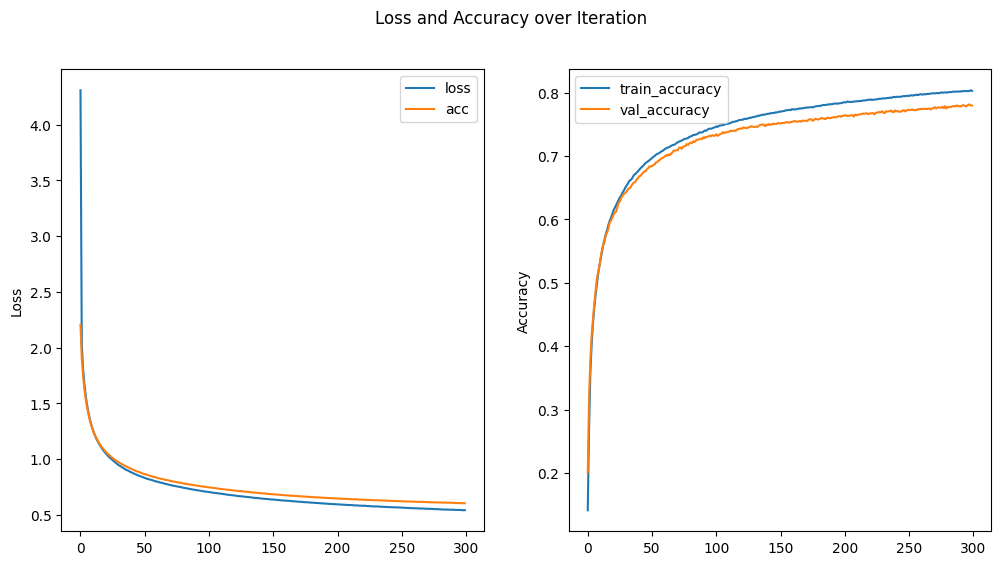

In [45]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 2, sharex=True, figsize=(12, 6))
fig.suptitle('Loss and Accuracy over Iteration')

ax[0].plot(train_losses, label='loss')
ax[0].plot(val_losses, label='acc')
ax[0].set_ylabel('Loss')
ax[0].legend()

ax[1].plot(train_accs, label='train_accuracy')
ax[1].plot(val_accs, label='val_accuracy')
ax[1].set_ylabel('Accuracy')
ax[1].legend()

plt.show()